# Unsupervised Machine Learning Walkthrough

This walkthrough will give you a real-world example of how AI models are trained. Make sure you read through the file in its entirety and understand each step. If you have questions, shoot them off in the forum!

Let's Goooo and Good Luck!

# NBA Team Dataset
Columns: Team, games_played, points, assist, three-point attempted, two-point made, defensive rebounds, offensive rebounds, steals, and blocks

Lets take a look at the data

In [ ]:
!pip install pandas kagglehub scikit-learn seaborn matplotlib

In [ ]:
import pandas as pd
import kagglehub
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Download latest version
path = kagglehub.dataset_download("mharvnek/nba-team-stats-00-to-18")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'nba-team-stats-00-to-18' dataset.
Path to dataset files: /kaggle/input/nba-team-stats-00-to-18


In [ ]:
dataPath = f'{path}/nba_team_stats_00_to_23.csv'

data = pd.read_csv(dataPath)

data.head()

,teamstatspk,Team,games_played,wins,losses,win_percentage,Min,points,field_goals_made,field_goals_attempted,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
0,0,Boston Celtics,82,64,18,0.780,3966,9887,3601,7396,...,3799,2207,979,557,538,304,1326,1416,930,2023-24
1,1,Denver Nuggets,82,57,25,0.695,3941,9418,3610,7279,...,3643,2415,1036,585,456,394,1489,1467,431,2023-24
2,2,Oklahoma City Thunder,82,57,25,0.695,3961,9847,3653,7324,...,3447,2223,1039,694,538,419,1545,1548,608,2023-24
3,3,Minnesota Timberwolves,82,56,26,0.683,3961,9264,3383,6974,...,3577,2184,1162,647,497,371,1544,1630,529,2023-24
4,4,LA Clippers,82,51,31,0.622,3941,9481,3473,7108,...,3523,2097,1078,640,413,384,1519,1537,269,2023-24


In [ ]:
data.columns

Index(['teamstatspk', 'Team', 'games_played', 'wins', 'losses',
       'win_percentage', 'Min', 'points', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'plus_minus', 'season'],
      dtype='object')

In [ ]:
data_sliced = data[['games_played', 'field_goals_made','field_goals_attempted', 'field_goal_percentage', 'three_pointers_made', 'three_pointers_attempted', 'three_point_percentage', 'free_throws_made', 'free_throw_attempted', 'free_throw_percentage','points', 'assists', 'steals', 'blocks', 'defensive_rebounds', 'offensive_rebounds', 'turnovers', 'blocks_attempted', 'personal_fouls', 'personal_fouls_drawn']]

data_sliced.head()

,games_played,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,free_throw_attempted,free_throw_percentage,points,assists,steals,blocks,defensive_rebounds,offensive_rebounds,turnovers,blocks_attempted,personal_fouls,personal_fouls_drawn
0,82,3601,7396,48.7,1351,3482,38.8,1334,1654,80.7,9887,2207,557,538,2923,876,979,304,1326,1416
1,82,3610,7279,49.6,958,2560,37.4,1240,1628,76.2,9418,2415,585,456,2762,881,1036,394,1489,1467
2,82,3653,7324,49.9,1090,2805,38.9,1451,1759,82.5,9847,2223,694,538,2725,722,1039,419,1545,1548
3,82,3383,6974,48.5,1037,2681,38.7,1461,1881,77.7,9264,2184,647,497,2807,770,1162,371,1544,1630
4,82,3473,7108,48.9,1036,2719,38.1,1499,1817,82.5,9481,2097,640,413,2701,822,1078,384,1519,1537


In [ ]:
data_sliced.describe()

,games_played,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,free_throw_attempted,free_throw_percentage,points,assists,steals,blocks,defensive_rebounds,offensive_rebounds,turnovers,blocks_attempted,personal_fouls,personal_fouls_drawn
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.00000
mean,80.430168,3062.220670,6716.244413,45.573743,654.132682,1828.652235,35.588408,1451.811453,1907.463687,76.198883,8230.385475,1812.224860,609.410615,393.428771,2557.713687,881.349162,1155.023743,393.428771,1668.815642,1303.78352
std,4.286506,251.252302,446.747528,1.686295,244.858190,658.066269,1.894185,179.820064,242.163581,3.002977,712.154467,209.520421,73.742012,67.002488,205.076013,121.544171,111.140487,59.046211,175.680398,674.01655
min,64.000000,2193.000000,5086.000000,40.800000,214.000000,641.000000,27.800000,889.000000,1198.000000,66.000000,5739.000000,1224.000000,390.000000,195.000000,1879.000000,509.000000,738.000000,245.000000,1109.000000,0.00000
25%,82.000000,2931.750000,6490.750000,44.400000,466.000000,1302.500000,34.400000,1340.500000,1742.250000,74.400000,7838.500000,1680.000000,559.750000,345.000000,2439.750000,794.000000,1086.000000,352.750000,1562.500000,1331.75000
50%,82.000000,3050.500000,6724.000000,45.500000,606.000000,1662.500000,35.500000,1452.000000,1908.000000,76.300000,8182.500000,1795.500000,605.000000,388.000000,2555.000000,886.000000,1157.000000,392.500000,1676.000000,1604.00000
75%,82.000000,3208.500000,7018.000000,46.700000,845.500000,2367.250000,36.900000,1568.000000,2067.250000,78.200000,8641.500000,1933.500000,657.000000,439.250000,2701.250000,967.250000,1224.000000,431.000000,1786.000000,1708.00000
max,82.000000,3855.000000,7739.000000,50.700000,1363.000000,3721.000000,41.600000,1977.000000,2587.000000,83.900000,10110.000000,2522.000000,844.000000,624.000000,3316.000000,1345.000000,1514.000000,565.000000,2189.000000,2104.00000


In [ ]:
data_sliced['field_goals_missed'] = data_sliced['field_goals_attempted'] - data_sliced['field_goals_made']
data_sliced['three_pointers_missed'] = data_sliced['three_pointers_attempted'] - data_sliced['three_pointers_made']
data_sliced['free_throw_missed'] = data_sliced['free_throw_attempted'] - data_sliced['free_throws_made']

data_sliced.head()


/tmp/ipython-input-1495008565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sliced['field_goals_missed'] = data_sliced['field_goals_attempted'] - data_sliced['field_goals_made']
/tmp/ipython-input-1495008565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sliced['three_pointers_missed'] = data_sliced['three_pointers_attempted'] - data_sliced['three_pointers_made']
/tmp/ipython-input-1495008565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,games_played,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,free_throw_attempted,free_throw_percentage,...,blocks,defensive_rebounds,offensive_rebounds,turnovers,blocks_attempted,personal_fouls,personal_fouls_drawn,field_goals_missed,three_pointers_missed,free_throw_missed
0,82,3601,7396,48.7,1351,3482,38.8,1334,1654,80.7,...,538,2923,876,979,304,1326,1416,3795,2131,320
1,82,3610,7279,49.6,958,2560,37.4,1240,1628,76.2,...,456,2762,881,1036,394,1489,1467,3669,1602,388
2,82,3653,7324,49.9,1090,2805,38.9,1451,1759,82.5,...,538,2725,722,1039,419,1545,1548,3671,1715,308
3,82,3383,6974,48.5,1037,2681,38.7,1461,1881,77.7,...,497,2807,770,1162,371,1544,1630,3591,1644,420
4,82,3473,7108,48.9,1036,2719,38.1,1499,1817,82.5,...,413,2701,822,1078,384,1519,1537,3635,1683,318


In [ ]:
data_sliced.columns

Index(['games_played', 'field_goals_made', 'field_goals_attempted',
       'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'points', 'assists', 'steals', 'blocks', 'defensive_rebounds',
       'offensive_rebounds', 'turnovers', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'field_goals_missed', 'three_pointers_missed',
       'free_throw_missed'],
      dtype='object')

In [ ]:
cols_to_divide = [
    col for col in data_sliced.columns
    if col not in ['Team', 'games_played', 'field_goal_percentage',
                   'three_point_percentage', 'free_throw_percentage']
]

# Perform safe division row-wise
data_sliced[cols_to_divide] = (
    data_sliced[cols_to_divide]
    .apply(lambda x: x / data_sliced['games_played'])
    .round(1)
)

data_sliced.head()


/tmp/ipython-input-5109111.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sliced[cols_to_divide] = (


,games_played,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,free_throw_attempted,free_throw_percentage,...,blocks,defensive_rebounds,offensive_rebounds,turnovers,blocks_attempted,personal_fouls,personal_fouls_drawn,field_goals_missed,three_pointers_missed,free_throw_missed
0,82,43.9,90.2,48.7,16.5,42.5,38.8,16.3,20.2,80.7,...,6.6,35.6,10.7,11.9,3.7,16.2,17.3,46.3,26.0,3.9
1,82,44.0,88.8,49.6,11.7,31.2,37.4,15.1,19.9,76.2,...,5.6,33.7,10.7,12.6,4.8,18.2,17.9,44.7,19.5,4.7
2,82,44.5,89.3,49.9,13.3,34.2,38.9,17.7,21.5,82.5,...,6.6,33.2,8.8,12.7,5.1,18.8,18.9,44.8,20.9,3.8
3,82,41.3,85.0,48.5,12.6,32.7,38.7,17.8,22.9,77.7,...,6.1,34.2,9.4,14.2,4.5,18.8,19.9,43.8,20.0,5.1
4,82,42.4,86.7,48.9,12.6,33.2,38.1,18.3,22.2,82.5,...,5.0,32.9,10.0,13.1,4.7,18.5,18.7,44.3,20.5,3.9


In [ ]:
data = data_sliced.drop(columns=['games_played'])
data_sliced = data.copy()
data_sliced.head()

,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,free_throw_attempted,free_throw_percentage,points,...,blocks,defensive_rebounds,offensive_rebounds,turnovers,blocks_attempted,personal_fouls,personal_fouls_drawn,field_goals_missed,three_pointers_missed,free_throw_missed
0,43.9,90.2,48.7,16.5,42.5,38.8,16.3,20.2,80.7,120.6,...,6.6,35.6,10.7,11.9,3.7,16.2,17.3,46.3,26.0,3.9
1,44.0,88.8,49.6,11.7,31.2,37.4,15.1,19.9,76.2,114.9,...,5.6,33.7,10.7,12.6,4.8,18.2,17.9,44.7,19.5,4.7
2,44.5,89.3,49.9,13.3,34.2,38.9,17.7,21.5,82.5,120.1,...,6.6,33.2,8.8,12.7,5.1,18.8,18.9,44.8,20.9,3.8
3,41.3,85.0,48.5,12.6,32.7,38.7,17.8,22.9,77.7,113.0,...,6.1,34.2,9.4,14.2,4.5,18.8,19.9,43.8,20.0,5.1
4,42.4,86.7,48.9,12.6,33.2,38.1,18.3,22.2,82.5,115.6,...,5.0,32.9,10.0,13.1,4.7,18.5,18.7,44.3,20.5,3.9


### Calculate Offensive + Defensive Production

In [ ]:
data_sliced['two_produtction'] = (data_sliced['field_goals_made'] - data_sliced['field_goals_missed']) * 2
data_sliced['three_production'] = (data_sliced['three_pointers_made'] - data_sliced['three_pointers_missed']) * 3
data_sliced['ft_production'] = (data_sliced['free_throws_made'] - data_sliced['free_throw_attempted']) * 1

data_sliced['off_ancillary'] = data_sliced['assists'] * .15 + data_sliced['personal_fouls_drawn'] * .10 + data_sliced['turnovers'] * -.5 + data_sliced['offensive_rebounds'] * .25

data_sliced['offensive_production'] = data_sliced['two_produtction'] + data_sliced['three_production'] + data_sliced['ft_production'] + data_sliced['off_ancillary']
data_sliced['defensive_production'] = data_sliced['defensive_rebounds'] * .15 + data_sliced['steals'] * .25 + data_sliced['blocks'] * .25 + data_sliced['personal_fouls'] * .10

data_sliced.head()

,field_goals_made,field_goals_attempted,field_goal_percentage,three_pointers_made,three_pointers_attempted,three_point_percentage,free_throws_made,free_throw_attempted,free_throw_percentage,points,...,personal_fouls_drawn,field_goals_missed,three_pointers_missed,free_throw_missed,two_produtction,three_production,ft_production,off_ancillary,offensive_production,defensive_production
0,43.9,90.2,48.7,16.5,42.5,38.8,16.3,20.2,80.7,120.6,...,17.3,46.3,26.0,3.9,-4.8,-28.5,-3.9,2.490,-34.710,10.310
1,44.0,88.8,49.6,11.7,31.2,37.4,15.1,19.9,76.2,114.9,...,17.9,44.7,19.5,4.7,-1.4,-23.4,-4.8,2.590,-27.010,10.050
2,44.5,89.3,49.9,13.3,34.2,38.9,17.7,21.5,82.5,120.1,...,18.9,44.8,20.9,3.8,-0.6,-22.8,-3.8,1.805,-25.395,10.635
3,41.3,85.0,48.5,12.6,32.7,38.7,17.8,22.9,77.7,113.0,...,19.9,43.8,20.0,5.1,-5.0,-22.2,-5.1,1.230,-31.070,10.510
4,42.4,86.7,48.9,12.6,33.2,38.1,18.3,22.2,82.5,115.6,...,18.7,44.3,20.5,3.9,-3.8,-23.7,-3.9,1.660,-29.740,9.985


In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_sliced)

scaled_df = pd.DataFrame(scaled_data, columns=data_sliced.columns)


In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scaled_df)
X_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
X_reduced.head()

,PC1,PC2
0,8.128690,2.097135
1,5.648628,2.813270
2,6.592980,3.531136
3,4.262591,2.632796
4,5.127352,2.903147


In [ ]:
scaled_df = X_reduced.copy()

kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(scaled_df)

scaled_df['cluster'] = kmeans.labels_

centers = kmeans.cluster_centers_

scaled_df.head()

,PC1,PC2,cluster
0,8.128690,2.097135,2
1,5.648628,2.813270,2
2,6.592980,3.531136,2
3,4.262591,2.632796,2
4,5.127352,2.903147,2


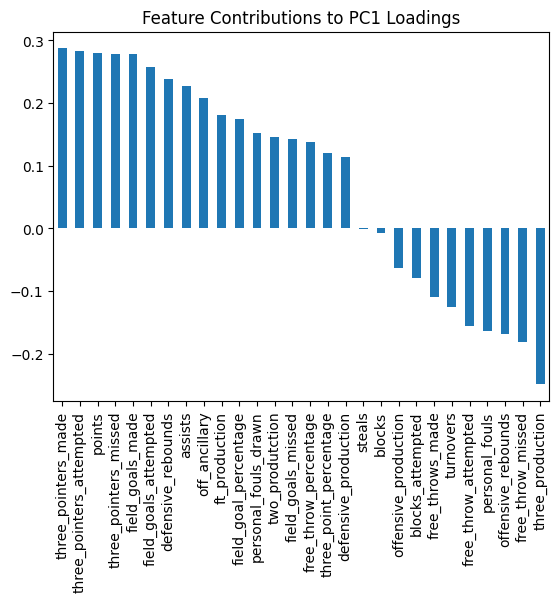

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=data_sliced.columns
)

loadings['PC1'].sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Contributions to PC1 Loadings')
plt.show()

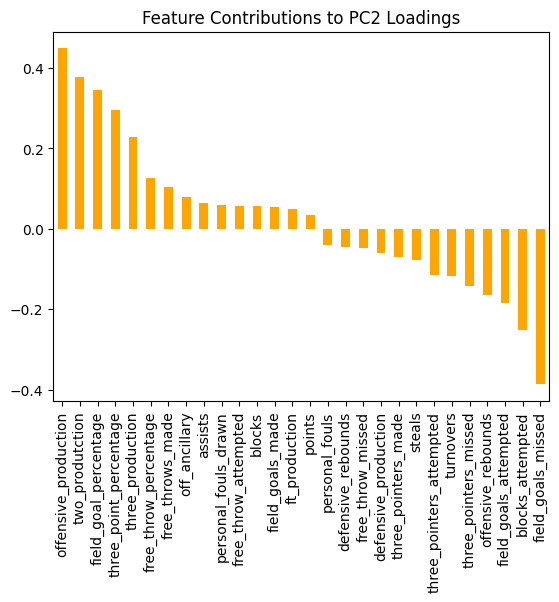

In [ ]:
loadings['PC2'].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Feature Contributions to PC2 Loadings')
plt.show()

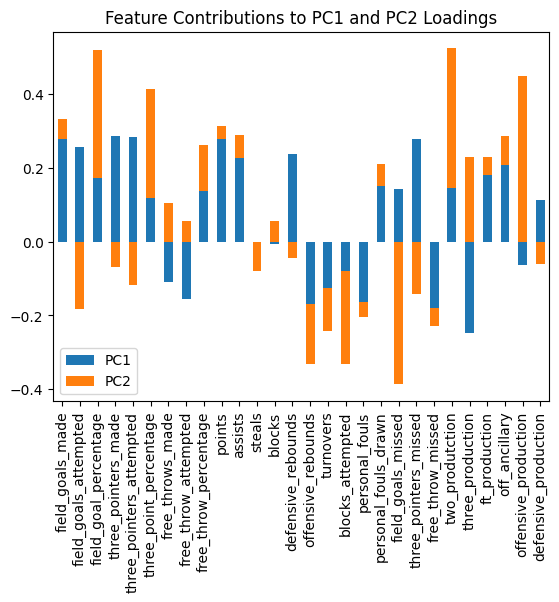

In [ ]:
loadings[['PC1', 'PC2']].plot(kind='bar', stacked=True)
plt.title('Feature Contributions to PC1 and PC2 Loadings')
plt.show()

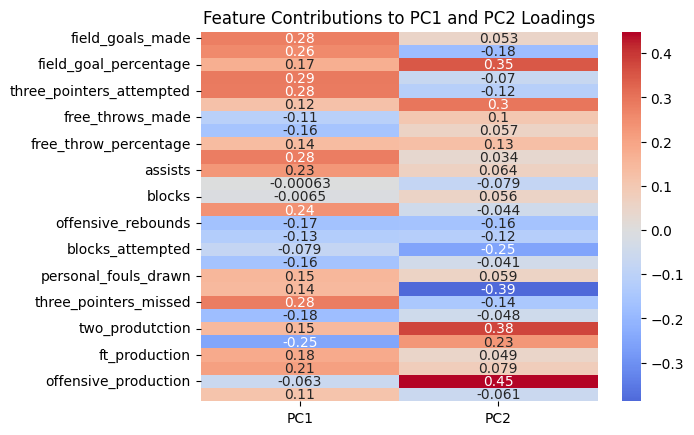

In [ ]:
import seaborn as sns

sns.heatmap(loadings[['PC1', 'PC2']], annot=True, cmap='coolwarm', center=0)
plt.title('Feature Contributions to PC1 and PC2 Loadings')
plt.show()

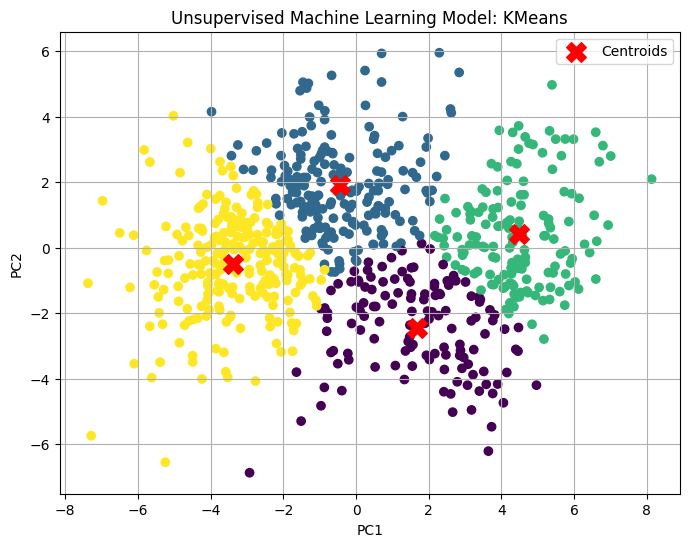

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_df['PC1'], scaled_df['PC2'], c=scaled_df['cluster'], cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('Unsupervised Machine Learning Model: KMeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


#Gaussian Technique

In [ ]:
gaussian_data = X_reduced.copy()
# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(gaussian_data)

# Predict cluster probabilities
probs = gmm.predict_proba(gaussian_data)

# Assign each point to the most likely cluster
labels = gmm.predict(gaussian_data)

gaussian_data.head()

,PC1,PC2
0,8.128690,2.097135
1,5.648628,2.813270
2,6.592980,3.531136
3,4.262591,2.632796
4,5.127352,2.903147


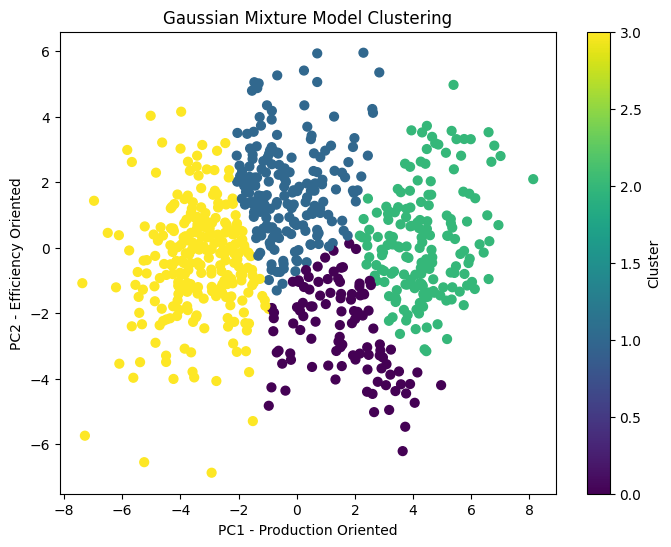

In [ ]:
# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(gaussian_data['PC1'], gaussian_data['PC2'], c=labels, cmap='viridis', s=40)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("PC1 - Production Oriented")
plt.ylabel("PC2 - Efficiency Oriented")
plt.colorbar(label="Cluster")
plt.show()